<a href="https://colab.research.google.com/github/1Anvitha/PRA3024_25/blob/main/ML_cifar_CNN_exercise_2_Anvitha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Some data-handling functions to download/import.

# from https://github.com/yandexdataschool/mlhep2018/blob/master/day2-Tue/seminar-03-keras-cnn/seminar_tf_keras.ipynb
"""I load some cifar"""

import numpy as np
from sklearn.model_selection import train_test_split
import os, sys
if sys.version_info[0] == 2:
    from urllib import urlretrieve
    import cPickle as pickle

else:
    from urllib.request import urlretrieve
    import pickle

def unpickle(file):
    fo = open(file, 'rb')
    if sys.version_info[0] == 2:
        dict = pickle.load(fo)
    else:
        dict = pickle.load(fo,encoding='latin1')

    fo.close()
    return dict




def download_cifar10(path,
                     url='https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
                     tarname='cifar-10-python.tar.gz',):
    import tarfile
    if not os.path.exists(path):
        os.mkdir(path)



    urlretrieve(url, os.path.join(path,tarname))
    tfile = tarfile.open(os.path.join(path,tarname))
    tfile.extractall(path=path)


def load_cifar10(data_path=".",channels_last=False,test_size=0.2,random_state=1337):

    test_path = os.path.join(data_path,"cifar-10-batches-py/test_batch")
    train_paths = [os.path.join(data_path,"cifar-10-batches-py/data_batch_%i"%i) for i in range(1,6)]

    if not os.path.exists(test_path) or not all(list(map(os.path.exists, train_paths))):
        print ("Dataset not found. Downloading...")
        download_cifar10(data_path)

    train_batches = list(map(unpickle,train_paths))
    test_batch = unpickle(test_path)

    X = np.concatenate([batch["data"] for batch in train_batches]).reshape([-1,3,32,32]).astype('float32')/255
    y = np.concatenate([batch["labels"] for batch in train_batches]).astype('int32')
    X_train,X_val,y_train,y_val = train_test_split(X,y,
                                                   test_size=test_size,
                                                   random_state=random_state)

    X_test = test_batch["data"].reshape([-1,3,32,32]).astype('float32')/255
    y_test = np.array(test_batch["labels"]).astype('int32')

    if channels_last:
        #convert from [batch,3,H,W] to [batch,H,W,3]
        #WARNING! Make this is only necessary for tensorflow-style dim order
        #If you use theano-style dimensions in keras config, skip this cell
        X_train = X_train.transpose([0,2,3,1])
        X_val   = X_val.transpose([0,2,3,1])
        X_test  = X_test.transpose([0,2,3,1])


    return X_train,y_train,X_val,y_val,X_test,y_test

In [2]:
import tensorflow as tf
#gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.1) # restricts GPU load for multi-user nodes

import tensorflow.keras as keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.18.0
3.8.0


In [3]:
# Load the data samples

x_train,y_train,x_val,y_val,x_test,y_test = load_cifar10("cifar_data",channels_last=True)

NUM_CLASSES = 25
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)
print("Val samples:", x_val.shape, y_val.shape)

Dataset not found. Downloading...
Train samples: (40000, 32, 32, 3) (40000,)
Test samples: (10000, 32, 32, 3) (10000,)
Val samples: (10000, 32, 32, 3) (10000,)


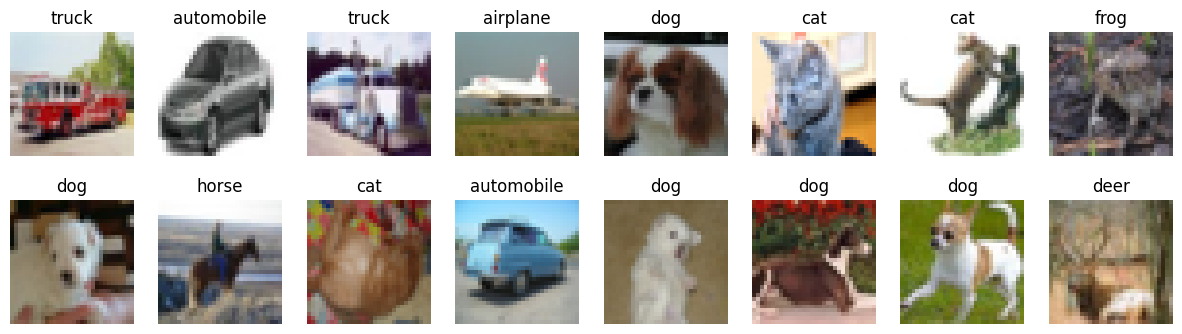

In [4]:
# show some random images from train, and their labels

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train)) #randomly selects the 16 images from the training databse
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off') #removes the lines, because with the lines it looked ugly
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index]]) #displays the selected images with the corresponding label
plt.show()

In [5]:
# normalize inputs
# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
# x_train = x_train.astype(np.float64) - 0.5

y_train = keras.utils.to_categorical(y_train, num_classes=10)

y_val = keras.utils.to_categorical(y_val, num_classes=10)

y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers import LeakyReLU
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [7]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """

    model = Sequential() #to build the layer by layer neural network

    ### STUDENT CODE HERE ###
    ### --> Build your convolutional neural network.
    ### First, make a CNN layer with some small kernels to learn some basic features, with Conv2D.
    ### Then, add a Pooling layer to pick up the relevant kernels.
    ### Then, Flatten it and add some fully-connected (Dense) normal NN layers,
    ###  to learn the relevant combinations of low-level kernel features.
    ### Finally, some regularisation is advised, using a Dropout layer, to avoid local minima.
    ### Make sure the output is of the same shape as the number of labels we have,
    ### And the input is the same as the figures (which now have a 3rd dimension - color!)
    ### Again, use google to find information on these classes.
    ### END STUDENT CODE ###

    # Input figures are of size 32x32x3 (32x32 pixels with 3 color channels)
    input_shape = (32, 32, 3) #defines the firwst layer with 32 filters of size 3 by 3

# Add a convolutional layer with 32 filters, each of size 3x3
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same')) # convolution layer with 64 filters of the same size
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))# ocnvolution layer with 128 filter of the same size
    model.add(MaxPooling2D(pool_size=(2, 2))) # down samples the feature map

# Add a pooling layer with size 2x2 and 'max' pooling function

# Flatten the output
    model.add(Flatten()) # changes the map to a 1D vector to make dense layers out of it
#the flattening is necessary because dense layers expect 1D input and they operate on flat vectors instead of matrices.

    model.add(Dense(128, activation='relu')) #fully conneected layers with 128 neurons

# Add a dropout layer
    model.add(Dropout(0.5)) #helps prevent overfitting by randomly dropping 50% of neurons


    model.add(Dense(10, activation='softmax')) # distriibution over 10 classes

# Compile the model with 'adam' optimizer, 'categorical_crossentropy' loss function, and 'accuracy' metric
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


    return model

In [8]:
model = make_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,143,242 (4.36 MB)

 Trainable params: 1,143,242 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

when i ran the code below setting the epoxh at 100 the accuracy value went down and fromt here when i reduced the epoch value lower and lower the accuracy increased. this suggeats overfitting to the training data which as I understand leads to decreasing validation accuracy.


In [9]:
### STUDENT CODE HERE ###
### --> change the parameters below to perform a better training

INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 128
EPOCHS = 36


K.clear_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=tf.keras.optimizers.Adamax(learning_rate=INIT_LR),  # Use tf.keras.optimizers.Adamax instead of keras.optimizers.legacy.Adamax, Removed legacy
    metrics=['accuracy']  # report accuracy during training
)

# fit model
model.fit(
    x_train, y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    shuffle=True,
)

# save weights to file to avoid re-training
model.save_weights(".weights.h5")

Epoch 1/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.2416 - loss: 2.0873 - val_accuracy: 0.4730 - val_loss: 1.4508
Epoch 2/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4346 - loss: 1.5478 - val_accuracy: 0.5547 - val_loss: 1.2674
Epoch 3/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5089 - loss: 1.3642 - val_accuracy: 0.6096 - val_loss: 1.1237
Epoch 4/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5588 - loss: 1.2324 - val_accuracy: 0.6518 - val_loss: 0.9944
Epoch 5/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6039 - loss: 1.1188 - val_accuracy: 0.6613 - val_loss: 0.9558
Epoch 6/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6319 - loss: 1.0268 - val_accuracy: 0.6951 - val_loss: 0.8875
Epoch 7/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6616 - loss: 0.9602 - val_accuracy: 0.7070 - val_loss: 0.8490
Epoch 8/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6826 - loss: 0.8949 - val_acc

In [10]:
# load weights from file (can call without model.fit)
model.load_weights(".weights.h5")

one of the ways to improve it was to use early stopping and I took bits and peices of code (the callback defining and the validation loss was from stackoverflow and the restore_best_weight was added by my friend who studies computer science) to put this together.

In [11]:
from keras.callbacks import EarlyStopping

# Defining EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # this is to overlook the validation loss
    patience=5, #this is to stop the code from running at 5 epochs after there are no improvement seen
    restore_best_weights=True
)

# Fit model with EarlyStopping
model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    shuffle=True,
    #I also added a manual stopping the code by adding a loop with model.train_on_batch(), but my friend studying computer science told me to use an automatic callback to prevent code from breaking
    callbacks=[early_stopping]
)


Epoch 1/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9207 - loss: 0.2023 - val_accuracy: 0.7483 - val_loss: 1.2868
Epoch 2/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9249 - loss: 0.2000 - val_accuracy: 0.7394 - val_loss: 1.2859
Epoch 3/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9235 - loss: 0.2024 - val_accuracy: 0.7445 - val_loss: 1.3105
Epoch 4/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9261 - loss: 0.1878 - val_accuracy: 0.7480 - val_loss: 1.4031
Epoch 5/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9250 - loss: 0.1923 - val_accuracy: 0.7463 - val_loss: 1.4804
Epoch 6/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9305 - loss: 0.1855 - val_accuracy: 0.7417 - val_loss: 1.4354
Epoch 7/36
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9293 - loss: 0.1829 - val_accuracy: 0.7463 - val_loss: 1.4037


As I saw the acurracy after the early stopping did increase to a 0.94 from 0.74 but the accuracy at the confuion matrix did not change.

it does mean that my code is not generalizing better. the validation accuracy also changed which does mean that the early stopping did work to some extent.

I couldn't exactly figue out why the confusion matrix's accuracy isn't any better.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


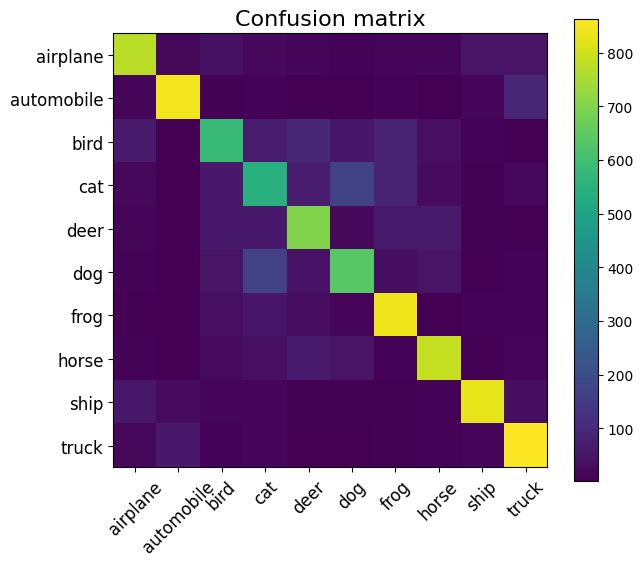

Test accuracy: 0.7404


In [12]:
# make test predictions
y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1) #uses the trained model to predict the class probabilities for x_test
y_pred_test_max_probas = np.max(y_pred_test, axis=1)#extracts the HIGHEST probability for each prediction
y_test_index = [list(onehot).index(1) for onehot in y_test] #y_test converts the one hot encoded into  a list of actual class indices for comparisio

# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_classes)) #extracts the graph and plots t
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test_index, y_pred_test_classes))

the yellow line and the green represent correct classification. the test accuracy = 73.74% meaninhg the model predicts around 73 percent of the sample.

the green patches mean that the bird and cat often get confused with each other.


the yellow above the truck and the in the automobile section also confuse with each other. which to some extent does make sense since they both have similar structural features.

the image classicfication problem can be seen in the dogs and cats category.


the categories that show classification with great accuracy are ship truck and frog.

one thing i realised while changing the epoch numbers and adding the early stopping was that the accuracy improved yes but the missclassifications remain quite the same, which might be A reason for the confusion matrix accuracy to be the same even the accuracy after the early stopping went higher.

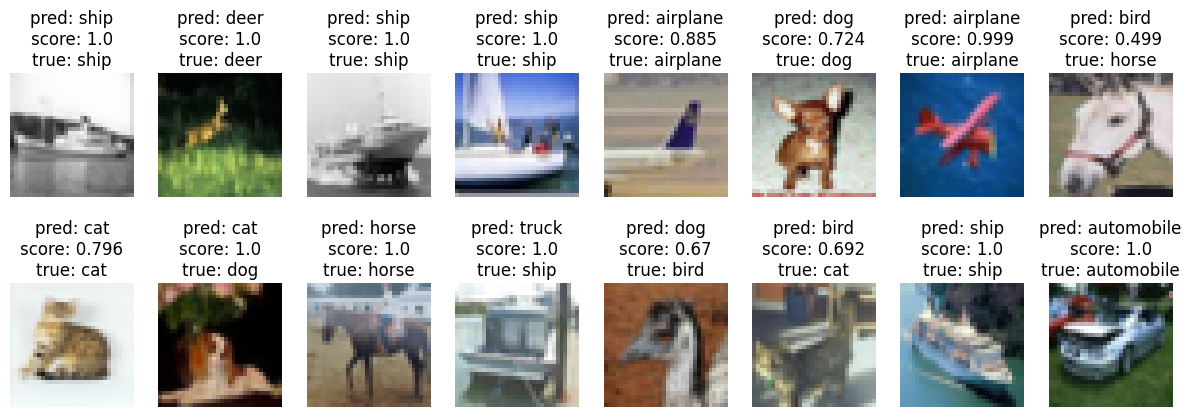

In [13]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test)) #randomly selects the images from the training dataset
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]] #retrives the predicted label

        pred_proba = y_pred_test_max_probas[random_index] #find the probability of the predicted test

        true_label = cifar10_classes[y_test_index[random_index]]  #finds the true label of the image and then plots it
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

#**this was analysis for the results I got before and I ran it before submiting the results changed a bit but I think overall I made sure to write what I understood**


1] all the result that gave a score of 1.0 concludes that the code runs well on these and interprets the given image as expected.


2] But the images that have a score of 0.85 and 0.499 (the airplane and the horse) , while they are correct the low score suggests that, there is a high chance of the model to be uncertain.

3] And the predicted airplane(0.584) which ha the true label as cat and the predicted airplane(0.75) but the true image was that of a bird and the automobile(0.83) which was truly a truck suggest that the model struggles a bit when the images get a bit blurry or have a non distinct feature.

while it is a bit justified for the truck and the automobile to get mixed up due the similar features, I don't get why there was such a wrong prediction for the cat.

as for the concern of the bird and the airplane mixup, i personally think since both airplane and birds have streamlined bodies, the code had a bit of difficulty differentiating between those.

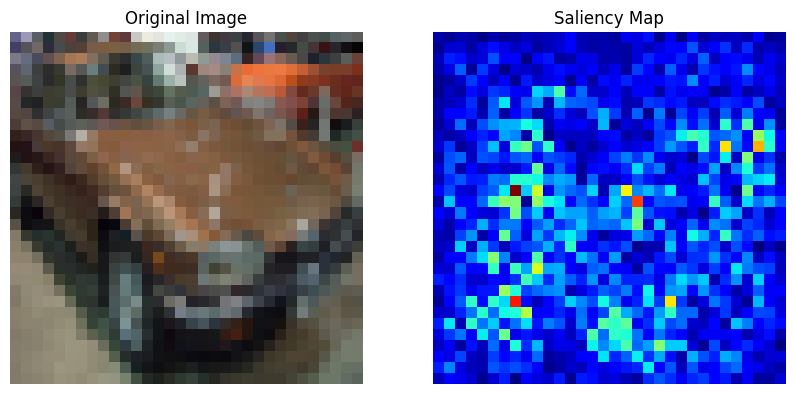

In [14]:
#this code was not entirely wrotten by me , two of my computer science friends helped me with it.
#the interpretation of the results is mine byt the code is not
#the result shave been anazlysed below in the text box

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


image_index = 2000 #this was extracted from the x_test set
input_image = x_test[image_index:image_index+1]

# Convert to tensor
input_tensor = tf.convert_to_tensor(input_image, dtype=tf.float32)


def compute_saliency_map(model, input_tensor):
    with tf.GradientTape() as tape:  #this is necessary because this code calculates the importance of each pixel

        tape.watch(input_tensor) #automatically trackss the tenson
        predictions = model(input_tensor, training=False)
        top_class = tf.argmax(predictions[0]) #identifies the class with the highest predicted probability
        loss = predictions[0, top_class] #uses the class's prediction score as a function to differentiate

    # Compute gradients
    gradients = tape.gradient(loss, input_tensor)

    saliency = tf.reduce_max(tf.abs(gradients), axis=-1) #'this converts the colour image gradients into a single channel saliency map'

    return saliency.numpy()[0]

# Compute saliency map
saliency_map = compute_saliency_map(model, input_tensor)


saliency_map = (saliency_map - np.min(saliency_map)) / (np.max(saliency_map) - np.min(saliency_map))  # 'this gives an image with proper visualisation'

# Plot original image and saliency map
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_image[0])
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(saliency_map, cmap="jet")
axes[1].set_title("Saliency Map")
axes[1].axis("off")

plt.show() #this gives a saliency map that highlights which parts of the image were most influential in the model''s decision

the left image shows the original input image and the right image is the saliency map which highlights the most important pixels the model used to make it's prediction.

the bright yellow and the tiny red regions are the areas that had the most influence on the model's decision.

the dark blue regions had no impact

the code is written in such a way that it interprets only some key feautres of the car, bu the ocncentration is scattered acrooss the image rather than highlightin the features like the wheels, windows or the overall car.


the saliency map is detecting some key features like the borders and the reflection on the surfaces and the edges, and this suggests that the code of the models works on learning meaningful features rather than random patterns.

In [ ]:
#i noticed a lot of places where i could improve but I honestly did not know how to code for it so I'm just adding a comment here on where I could improve

#if I introduced more diverse training samples , especially for confusion matrix I would have had better accuracy
#getting a better extraction technique or use transfer learning for better performance

#in the saliency map if I knew how to highlight irrelevant areas, adjusting the architecture or adding more diverse training example would give a better map


# Some tips on how to improve:

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.

## Potential grading:
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for building a network that gets above 20% accuracy
* +1 for beating each of these milestones on __TEST__ dataset:
    * 50% (5 total)
    * 60% (6 total)
    * 65% (7 total)
    * 70% (8 total)
    * 75% (9 total)
    * 80% (10 total)

## Bonus points
Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example \"A super-small/fast NN that gets 80%\" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)


## Tips on what can be done:

 * __Network size__
   * More neurons,
   * More layers, ([lasagne docs](http://lasagne.readthedocs.org))
   * Nonlinearities in the hidden layers
   * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.

 * __Convolution layers__
   * they __are a must__ unless you have any super-ideas
   * `network = lasagne.layers.Conv2DLayer(prev_layer,`
     `                       num_filters = n_neurons,`
     `                       filter_size = (filter width, filter height),`
     `                       nonlinearity = some_nonlinearity)`
   * Warning! Training convolutional networks can take long without GPU. That's okay.
     * If you are CPU-only, we still recomment to try a simple convolutional architecture
     * a perfect option is if you can set it up to run at nighttime and check it up at the morning.
     * Make reasonable layer size estimates. A 128-neuron first convolution is likely an overkill.
     * __To reduce computation__ time by a factor in exchange for some accuracy drop, try using __stride__ parameter. A stride=2 convolution should take roughly 1/4 of the default (stride=1) one.

   * Plenty other layers and architectures
     * http://lasagne.readthedocs.org/en/latest/modules/layers.html
     * batch normalization, pooling, etc


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum


 * __Faster optimization__ -
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs
   * __BatchNormalization__ (lasagne.layers.batch_norm) FTW!


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - http://lasagne.readthedocs.org/en/latest/modules/regularization.html
   * Dropout - to prevent overfitting
     * `lasagne.layers.DropoutLayer(prev_layer, p=probability_to_zero_out)`   
     * Don't overdo it. Check if it actually makes your network better


 * __Data augmentation__ - getting 5x as large dataset for free is a great deal
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Add Noize (easiest: GaussianNoizeLayer)
   * Simple way to do that (if you have PIL/Image):
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.


